## 0. Setup

In [3]:
from typing import Literal
import random
from IPython.display import Image, display
import nest_asyncio
from langchain_core.runnables.graph import MermaidDrawMethod
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import MessagesState
from langgraph.types import Command

In [4]:
nest_asyncio.apply()

# 1. Peer-to-Peer

Pipeline & Network

## 1.1. Pipeline

In [5]:
def l1_agent(state: MessagesState):
    print(f"started with l1_agent")
    next_node = "l2_agent"
    print(f"handed off to {next_node}")

In [6]:
def l2_agent(state: MessagesState):
    next_node = "l3_agent"
    print(f"handed off to {next_node}")

In [7]:
def l3_agent(state: MessagesState):
    next_node = END
    print(f"handed off to {next_node}")

In [8]:
workflow = StateGraph(MessagesState)
workflow.add_node(l1_agent)
workflow.add_node(l2_agent)
workflow.add_node(l3_agent)

workflow.add_edge(START, "l1_agent")
workflow.add_edge("l1_agent", "l2_agent")
workflow.add_edge("l2_agent", "l3_agent")
workflow.add_edge("l3_agent", END)


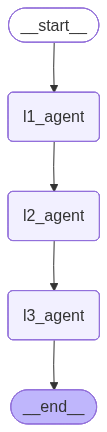

In [10]:
graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [11]:
import pyppeteer

In [12]:
graph.invoke(
    input={}
)

started with l1_agent
handed off to l2_agent
handed off to l3_agent
handed off to __end__


## 1.2. Network

In [13]:
def l1_agent(state: MessagesState) -> Command[Literal["l2_agent", "l3_agent", END]]:
    print(f"started with l1_agent")
    next_node = random.choice(["l2_agent", "l3_agent", END])
    print(f"handed off to {next_node}")

    return Command(
        goto=next_node,
    )

In [14]:
def l2_agent(state: MessagesState) -> Command[Literal["l1_agent", "l3_agent", END]]:
    next_node = random.choice(["l2_agent", "l3_agent", END])
    print(f"handed off to {next_node}")

    return Command(
        goto=next_node,
    )

In [15]:
def l3_agent(state: MessagesState) -> Command[Literal["l1_agent", "l2_agent", END]]:
    next_node = random.choice(["l1_agent", "l2_agent", END])
    print(f"handed off to {next_node}")
    return Command(
        goto=next_node,
    )

In [16]:
workflow = StateGraph(MessagesState)
workflow.add_node(l1_agent)
workflow.add_node(l2_agent)
workflow.add_node(l3_agent)

workflow.add_edge(START, "l1_agent")

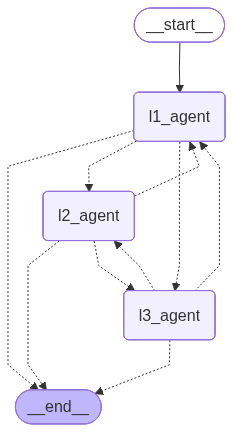

In [17]:
graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [18]:
graph.invoke(
    input={}
)

started with l1_agent
handed off to l3_agent
handed off to l2_agent
handed off to l3_agent
handed off to l1_agent
started with l1_agent
handed off to __end__


# 2. Orchestrator

Supervisor vs Hierarchical

## 2.1. Supervisor

In [19]:
def supervisor(state: MessagesState) -> Command[Literal["l1_agent", "l2_agent", END]]:
    next_node = random.choice(["l1_agent", "l2_agent", END])
    print(f"supervisor handed off to {next_node}")
    return Command(
        goto=next_node
    )

In [20]:
def l1_agent(state: MessagesState) -> Command[Literal["supervisor"]]:
    next_node = "supervisor"
    print(f"l1_agent handed off to {next_node}")
    return Command(
        goto=next_node
    )

In [21]:
def l2_agent(state: MessagesState) -> Command[Literal["supervisor"]]:
    next_node = "supervisor"
    print(f"l2_agent handed off to {next_node}")
    return Command(
        goto=next_node
    )

In [22]:
workflow = StateGraph(MessagesState)
workflow.add_node(supervisor)
workflow.add_node(l1_agent)
workflow.add_node(l2_agent)

workflow.add_edge(START, "supervisor")

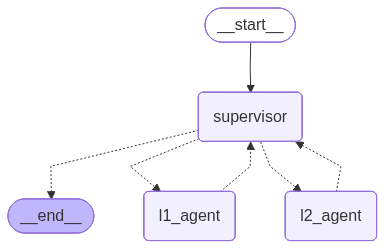

In [24]:
graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [25]:
graph.invoke(
    input={}
)

supervisor handed off to l1_agent
l1_agent handed off to supervisor
supervisor handed off to l1_agent
l1_agent handed off to supervisor
supervisor handed off to __end__


## 2.2. Hierarchical

In [26]:
def l1_agent(state: MessagesState) -> Command[Literal["l2_agent", "l3_agent", END]]:
    next_node = random.choice(["l2_agent", "l3_agent", END])
    print(f"l1_agent handed off to {next_node}")
    return Command(
        goto=next_node
    )

In [27]:
def l2_agent(state: MessagesState) -> Command[Literal["l4_agent", "l5_agent", "l1_agent"]]:
    next_node = random.choice(["l1_agent", "l4_agent", "l5_agent"])
    print(f"l2_agent handed off to {next_node}")
    return Command(
        goto=next_node
    )

In [28]:
def l3_agent(state: MessagesState) -> Command[Literal["l1_agent"]]:
    next_node = "l1_agent"
    print(f"l3_agent handed off to {next_node}")
    return Command(
        goto=next_node
    )

In [29]:
def l4_agent(state: MessagesState) -> Command[Literal["l2_agent"]]:
    next_node = "l2_agent"
    print(f"l4_agent handed off to {next_node}")
    return Command(
        goto=next_node
    )

In [30]:
def l5_agent(state: MessagesState) -> Command[Literal["l2_agent"]]:
    next_node = "l2_agent"
    print(f"l5_agent handed off to {next_node}")
    return Command(
        goto=next_node
    )

In [31]:
workflow = StateGraph(MessagesState)
workflow.add_node(l1_agent)
workflow.add_node(l2_agent)
workflow.add_node(l3_agent)
workflow.add_node(l4_agent)
workflow.add_node(l5_agent)

workflow.add_edge(START, "l1_agent")

In [35]:
graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

ValueError: Failed to reach https://mermaid.ink API while trying to render your graph. Status code: 204.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [36]:
graph.invoke(
    input={}
)

l1_agent handed off to l3_agent
l3_agent handed off to l1_agent
l1_agent handed off to __end__
